# Computational Chemistry - Hands on Data Clustering Molecules
### Luis Filipe C. de Menezes - RA: 164924
This is part of an assignment for the Computational Intelligence in Chemistry course on UNIFESP's masters program.

This notebook must use data from QM9 to do the following:

I. Select the subset and compute the RDKit
descriptors

II. Select three dimensionality reduction techniques
- I. Feature selection, e.g., variance
- II. Linear, e.g., PCA
- III. Nonlinear, e.g., t-SNE

III. Visualization – Create scatter plots:
- I.Color by a molecular property (e.g., HOMO)
- II.Color by a cluster label (consider the same approach used in the assignment 2)
IV. Interpretation
- I.Which descriptor better separate the molecules?
- II.How does the structure of the data change when using distinct methods?
- III.Can we observe any trend/pattern?

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem

In [2]:
qm9_folder = 'qm9_files/'

## I. Select the subset and compute the RDKit descriptors

In [3]:
from rdkit import Chem
from rdkit.Chem.Descriptors import CalcMolDescriptors

def calculate_descriptors(molecule):
  return CalcMolDescriptors(molecule)

if __name__ == '__main__':
  with open(qm9_folder+'dsgdb9nsd_113885.xyz', 'r') as file:
      lines = file.readlines()
      print("Test Smiles:", lines[22].split()[0])
      mol = Chem.MolFromSmiles(lines[22].split()[0])
      desc = calculate_descriptors(mol)
      print(len(desc))
      print(desc)


Test Smiles: CC(=O)OC1CC1CO
217
{'MaxAbsEStateIndex': np.float64(10.251797052154195), 'MaxEStateIndex': np.float64(10.251797052154195), 'MinAbsEStateIndex': np.float64(0.006944444444443976), 'MinEStateIndex': np.float64(-0.2537499999999999), 'qed': 0.5320958672596746, 'SPS': 31.77777777777778, 'MolWt': 130.143, 'HeavyAtomMolWt': 120.06299999999999, 'ExactMolWt': 130.06299418, 'NumValenceElectrons': 52, 'NumRadicalElectrons': 0, 'MaxPartialCharge': 0.30241121711845265, 'MinPartialCharge': -0.46215903404388115, 'MaxAbsPartialCharge': 0.46215903404388115, 'MinAbsPartialCharge': 0.30241121711845265, 'FpDensityMorgan1': 1.8888888888888888, 'FpDensityMorgan2': 2.5555555555555554, 'FpDensityMorgan3': 2.888888888888889, 'BCUT2D_MWHI': 16.548514147408408, 'BCUT2D_MWLOW': 10.455302265232834, 'BCUT2D_CHGHI': 2.387953171857901, 'BCUT2D_CHGLO': -1.9567445144921385, 'BCUT2D_LOGPHI': 2.3220598457779755, 'BCUT2D_LOGPLOW': -2.035415046518579, 'BCUT2D_MRHI': 5.65985206464089, 'BCUT2D_MRLOW': -0.14228514

In [ ]:
qm9_csv = 'datasets_csv/qm9_results.csv'  # caminho com os dados da segunda atividade

# lê o csv completo
df_full = pd.read_csv(qm9_csv)

# seleciona as primeiras 20.000 amostras (ou amostra aleatória se preferir)
df = df_full.sample(n=20000, random_state=42).reset_index(drop=True)

# Ignora colunas de descritores já calculados
df = df.drop(columns=['nBase','nAcid','RingCount','Chi0','MolLogP','MolWt','TPSA','Fraction CSP3','Phi'])


In [5]:
list_desc = []
for smi in df['smiles']:
    mol = Chem.MolFromSmiles(smi)
    desc = calculate_descriptors(mol)
    list_desc.append(desc)

In [6]:
df_desc = pd.DataFrame(list_desc)
df = pd.concat([df, df_desc], axis=1)

print(f"Adicionados {df_desc.shape[1]} colunas de descritores. df.shape = {df.shape}")
print(f"Nomes dos descritores adicionados: {list(df_desc.columns)}")


Adicionados 217 colunas de descritores. df.shape = (20000, 255)
Nomes dos descritores adicionados: ['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR

In [7]:
df.dropna(inplace=True, axis=1)
print(df.shape)

(20000, 255)


In [8]:
desc = df.drop(columns=['id', 'n_atoms', 'atom_list', 'smiles', 'cluster2','k_2','k_3','k_4',
                        'k_5','k_6','k_7','k_8','k_9','k_10','hdbscan_15','hdbscan_25','hdbscan_50',
                        'hdbscan_75','hdbscan_100','hdbscan_250','hdbscan_500','PC1','PC2',
                        'A','B','C','mu','alpha','homo','lumo','gap','r2','zpve','U0','U','H','G','Cv'])


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(desc)


## II. Select three dimensionality reduction techniques


### i. Feature selection.

We will use feature selection by the training proccess. We will train a Random Forest model and get the featuer importance out of the model. The features with biggest importance will be selected.

For this training model we will have to select a target property. Aiming to don't bias our method, we will select 5 target properties and calculate the mean feature importance for each feature. 

Using the first assignment correlation matrix, we can extract the properties that are less correlated.

In [10]:

targets = df[['U', 'Cv', 'A', 'mu', 'homo']]

In [11]:
display(desc.head())
display(targets.head())

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           8.308333        8.308333           0.120764        0.120764   
1           8.829259        8.829259           0.089722       -0.097222   
2           8.277853        8.277853           0.334167        0.334167   
3          10.550556       10.550556           0.290509       -0.290509   
4           5.506898        5.506898           0.686343        0.686343   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.494150  11.555556  126.203         112.091  126.115698   
1  0.495476   9.444444  125.131         118.075  125.058912   
2  0.240694  33.555556  123.155         114.083  123.068414   
3  0.508400  33.777778  128.175         116.079  128.094963   
4  0.475063  10.666667  122.131         116.083  122.059246   

   NumValenceElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                   52  ...           0             0           0   
1                   48  ...           0             0           0   
2                   48  ...           0             0           0   
3                   52  ...           0             0           0   
4                   46  ...           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0             0   
1                  0             0            0            0             0   
2                  1             0            0            0             0   
3                  0             0            0            0             0   
4                  0             0            0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        1  
4                 0        0  

[5 rows x 217 columns]

U      Cv        A      mu    homo
0 -384.461436  40.649  2.79380  4.4655 -0.2276
1 -434.102712  29.527  3.29176  5.1184 -0.1991
2 -401.855450  35.876  2.26250  0.7746 -0.2321
3 -420.439600  36.654  1.94881  3.5587 -0.2335
4 -413.011462  29.154  3.29104  3.9219 -0.1701

In [12]:
from sklearn.ensemble import RandomForestRegressor

all_importances = {}

for prop in targets.columns.values:
    print(f"Treinando modelo para a propriedade: {prop}...")
    
    X = X_scaled
    y = targets[prop]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X, y)
    
    # 3. Guarde a feature importance de cada modelo
    all_importances[prop] = model.feature_importances_



Treinando modelo para a propriedade: U...
Treinando modelo para a propriedade: Cv...
Treinando modelo para a propriedade: A...
Treinando modelo para a propriedade: mu...
Treinando modelo para a propriedade: homo...


In [13]:
importances_df = pd.DataFrame(all_importances, index=desc.columns)

importances_df['mean_importance'] = importances_df.mean(axis=1)


final_ranking = importances_df.sort_values(by='mean_importance', ascending=False)
print("\nRanking final de features pela média de importância:")
print(final_ranking['mean_importance'])



Ranking final de features pela média de importância:
HeavyAtomMolWt    0.187328
Kappa1            0.062148
Chi0n             0.050337
Chi0v             0.049820
HallKierAlpha     0.047560
                    ...   
fr_sulfide        0.000000
fr_thiazole       0.000000
fr_sulfone        0.000000
fr_thiophene      0.000000
fr_thiocyan       0.000000
Name: mean_importance, Length: 217, dtype: float64


#### Visualizing the descriptors distribution

In [14]:
desc_selected_by_feat = desc[final_ranking.head(2).index]
display(desc_selected_by_feat)

HeavyAtomMolWt    Kappa1
0             112.091  8.450000
1             118.075  5.810208
2             114.083  6.154533
3             116.079  6.390919
4             116.083  4.430955
...               ...       ...
19995          94.053  3.982117
19996         114.083  5.685804
19997         116.075  4.692129
19998         118.071  6.548624
19999         112.087  7.071607

[20000 rows x 2 columns]

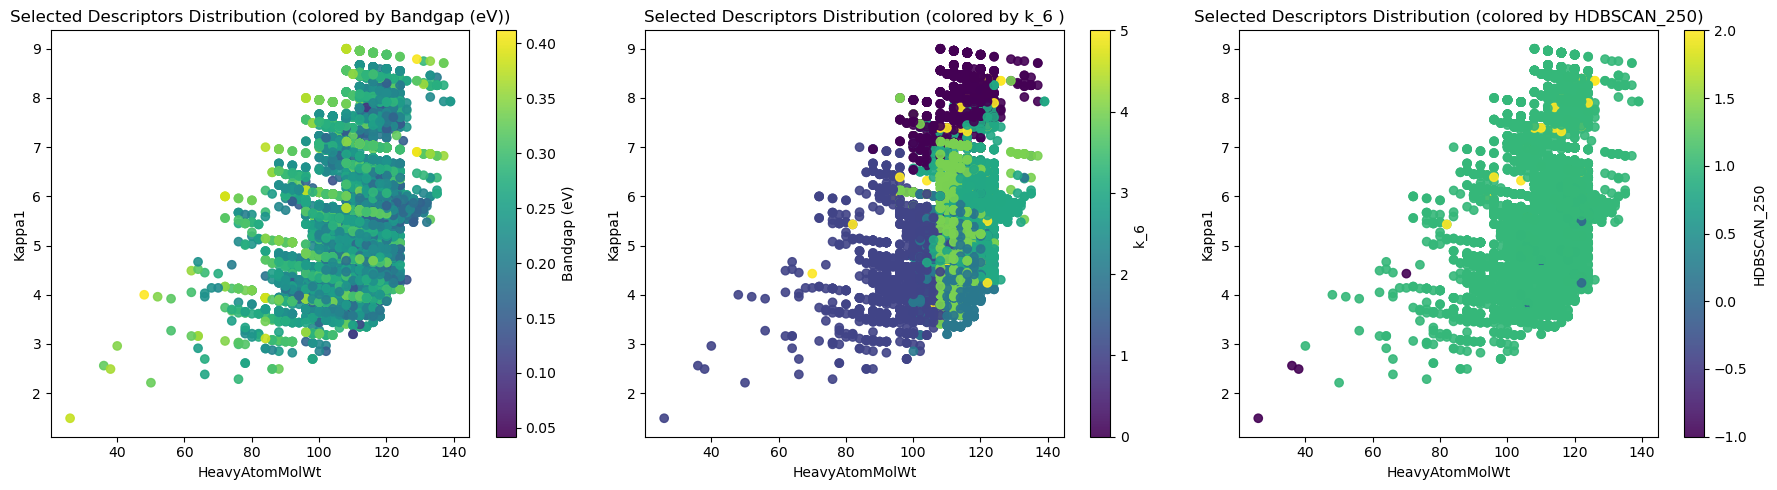

In [22]:
def plot_2d_descriptors_distribution(X_data, feature_names, color_data, color_labels, title_prefix="2D Distribution"):
    """
    Plot 2D scatter plots of descriptors colored by different properties.
    
    Parameters:
    X_data: array-like, shape (n_samples, 2) - The 2D data to plot
    feature_names: list of str - Names of the two features
    color_data: dict - Dictionary with color data {label: values}
    color_labels: list of str - Labels for the color data
    title_prefix: str - Prefix for plot titles
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, (color_key, color_label) in enumerate(zip(color_data.keys(), color_labels)):
        scatter = axes[i].scatter(X_data[:, 0], X_data[:, 1], 
                                 c=color_data[color_key], 
                                 cmap='viridis', alpha=0.9)
        
        axes[i].set_xlabel(feature_names[0])
        axes[i].set_ylabel(feature_names[1])
        axes[i].set_title(f'{title_prefix} (colored by {color_label})')
        
        plt.colorbar(scatter, ax=axes[i], label=color_label)
    
    plt.tight_layout()
    plt.show()

# Use the function with the selected descriptors
X_2d = desc_selected_by_feat.values
feature_names = desc_selected_by_feat.columns.tolist()[:2]  # Take first 2 features

color_data = {
    'gap': df['gap'],
    'k_6': df['k_6'], 
    'hdbscan_250': df['hdbscan_250']
}

color_labels = ['Bandgap (eV)', 'k_6 ', 'HDBSCAN_250']

plot_2d_descriptors_distribution(X_2d, feature_names, color_data, color_labels, 
                                "Selected Descriptors Distribution")

##### Seeing the best 3 descriptors.

In [16]:
desc_selected_by_feat = desc[final_ranking.head(3).index]

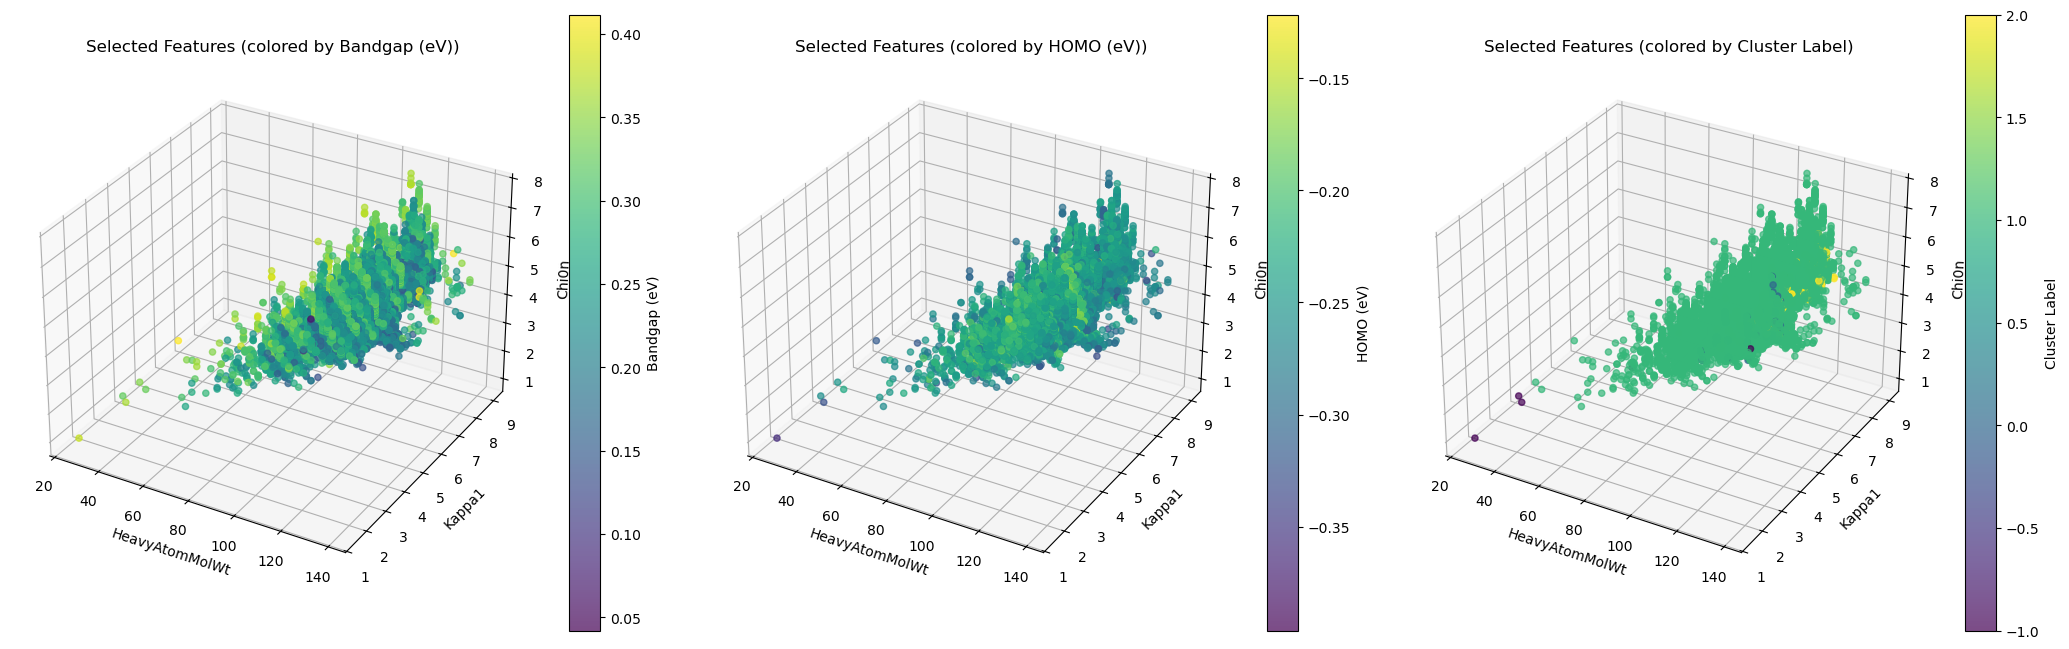

In [17]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_feature_space(X_data, feature_names, color_data_dict, title_prefix="3D Feature Space"):
    """
    Plot 3D scatter plots of features colored by different properties.
    
    Parameters:
    X_data: array-like, shape (n_samples, 3) - The 3D data to plot
    feature_names: list of str - Names of the three features [x, y, z]
    color_data_dict: dict - Dictionary with color data {label: (values, color_label)}
    title_prefix: str - Prefix for plot titles
    """
    if X_data.shape[1] != 3:
        raise ValueError(f"X_data must have 3 columns for 3D plot, current shape: {X_data.shape}")
    
    n_plots = len(color_data_dict)
    fig = plt.figure(figsize=(7*n_plots, 8))
    
    for i, (color_key, (color_values, color_label)) in enumerate(color_data_dict.items()):
        ax = fig.add_subplot(1, n_plots, i+1, projection='3d')
        
        scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], 
                           s=20, alpha=0.7, c=color_values, cmap='viridis')
        
        ax.set_xlabel(feature_names[0])
        ax.set_ylabel(feature_names[1])
        ax.set_zlabel(feature_names[2])
        ax.set_title(f'{title_prefix} (colored by {color_label})')
        
        plt.colorbar(scatter, ax=ax, label=color_label, shrink=0.8)
    
    plt.tight_layout()
    plt.show()

# Use the function with selected features
X3 = desc_selected_by_feat.values
cols = desc_selected_by_feat.columns.tolist()

# Define color data
color_data_3d = {
    'gap': (df['gap'], 'Bandgap (eV)'),
    'homo': (df['homo'], 'HOMO (eV)'),
    'cluster': (df.get('hdbscan_250', df.get('k_6', np.zeros(len(df)))), 'Cluster Label')
}

plot_3d_feature_space(X3, cols, color_data_3d, "Selected Features")

### ii. PCA


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)


print("Explained PCA variance ratio:", pca.explained_variance_ratio_)

Explained PCA variance ratio: [0.17526346 0.08229934 0.06510412]


#### Visualizing the reduced feature space

##### 2D feature space

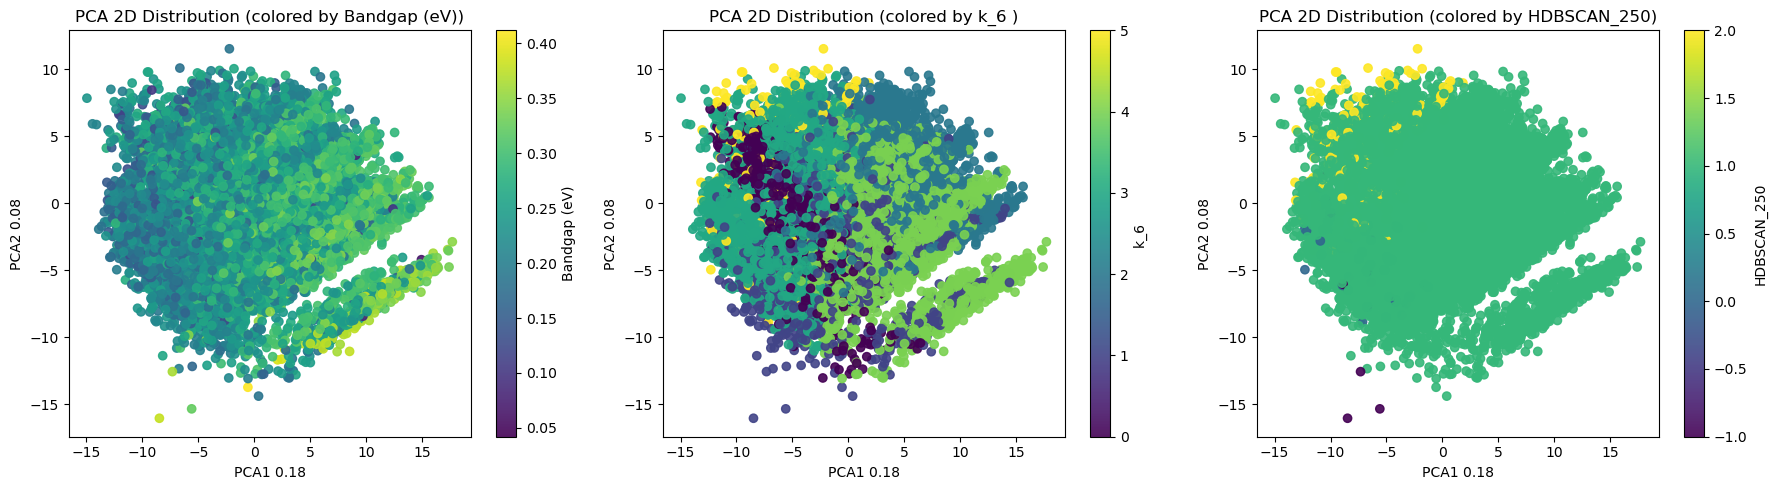

In [ ]:
color_labels = ['Bandgap (eV)', 'k_6 ', 'HDBSCAN_250']

plot_2d_descriptors_distribution(X_pca[:, :2], [f'PCA1 ({pca.explained_variance_ratio_[0]:.2f})', f'PCA2 ({pca.explained_variance_ratio_[1]:.2f})'], color_data, color_labels, 
                                "PCA 2D Distribution")

##### 3D feature space

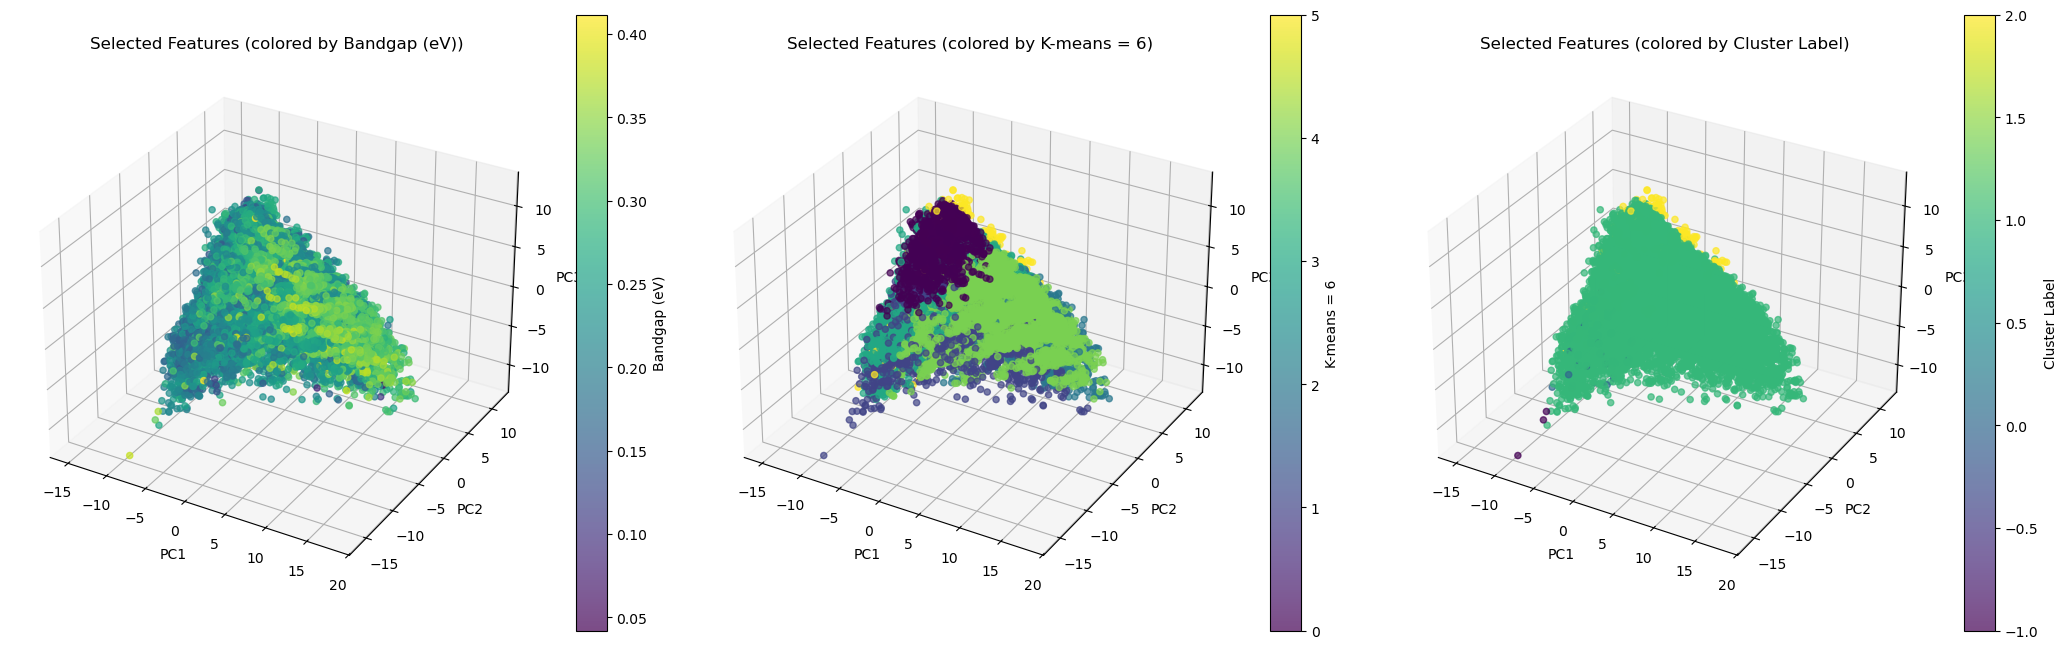

In [29]:
color_data_3d = {
    'gap': (df['gap'], 'Bandgap (eV)'),
    'homo': (df['k_6'], 'K-means = 6'),
    'cluster': (df.get('hdbscan_250', df.get('k_6', np.zeros(len(df)))), 'Cluster Label')
}
cols = ['PC1', 'PC2', 'PC3']
plot_3d_feature_space(X_pca, cols, color_data_3d, "Selected Features")

### iii. Non-linear method (SOM, t-SNE).

#### t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# Apply t-SNE with 3 components
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

print(f"t-SNE 2D shape: {X_tsne_2d.shape}")
print(f"t-SNE 3D shape: {X_tsne_3d.shape}")

t-SNE 2D shape: (20000, 2)
t-SNE 3D shape: (20000, 3)


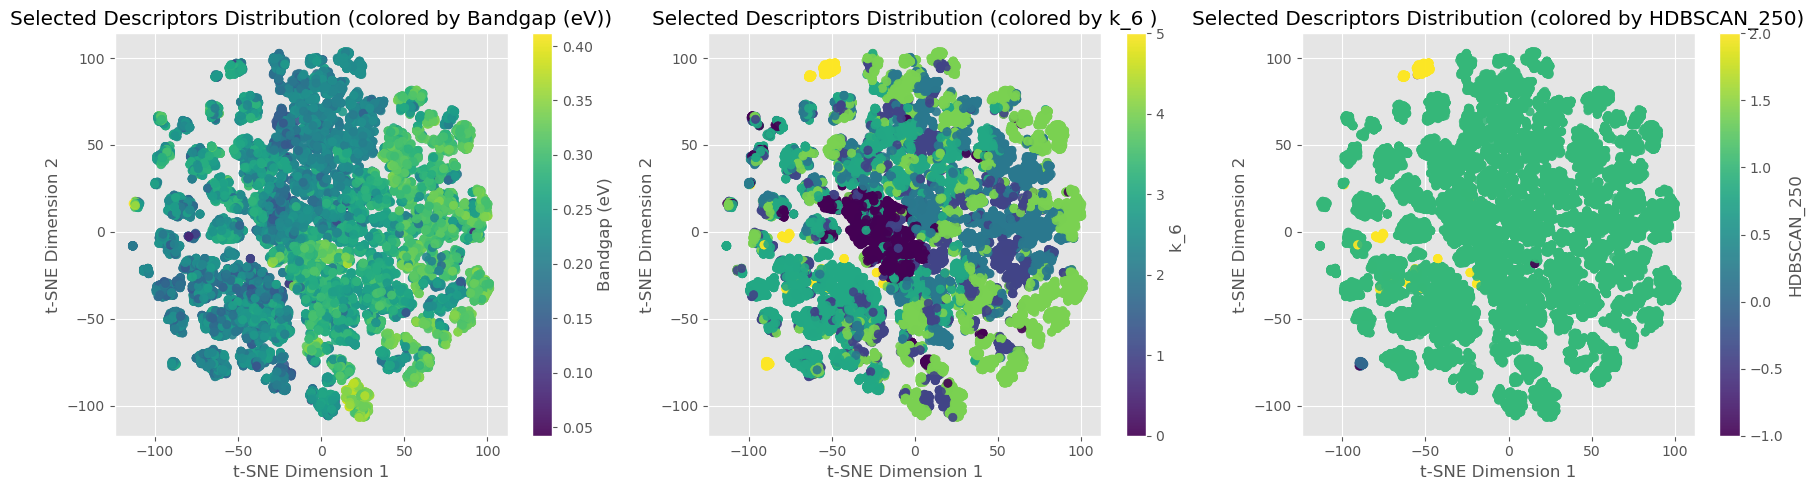

In [50]:
feature_names = ['t-SNE Dimension 1', 't-SNE Dimension 2']  # Take first 2 features

color_data = {
    'gap': df['gap'],
    'k_6': df['k_6'], 
    'hdbscan_250': df['hdbscan_250']
}

color_labels = ['Bandgap (eV)', 'k_6 ', 'HDBSCAN_250']

plot_2d_descriptors_distribution(X_tsne_2d, feature_names, color_data, color_labels, 
                                "Selected Descriptors Distribution")

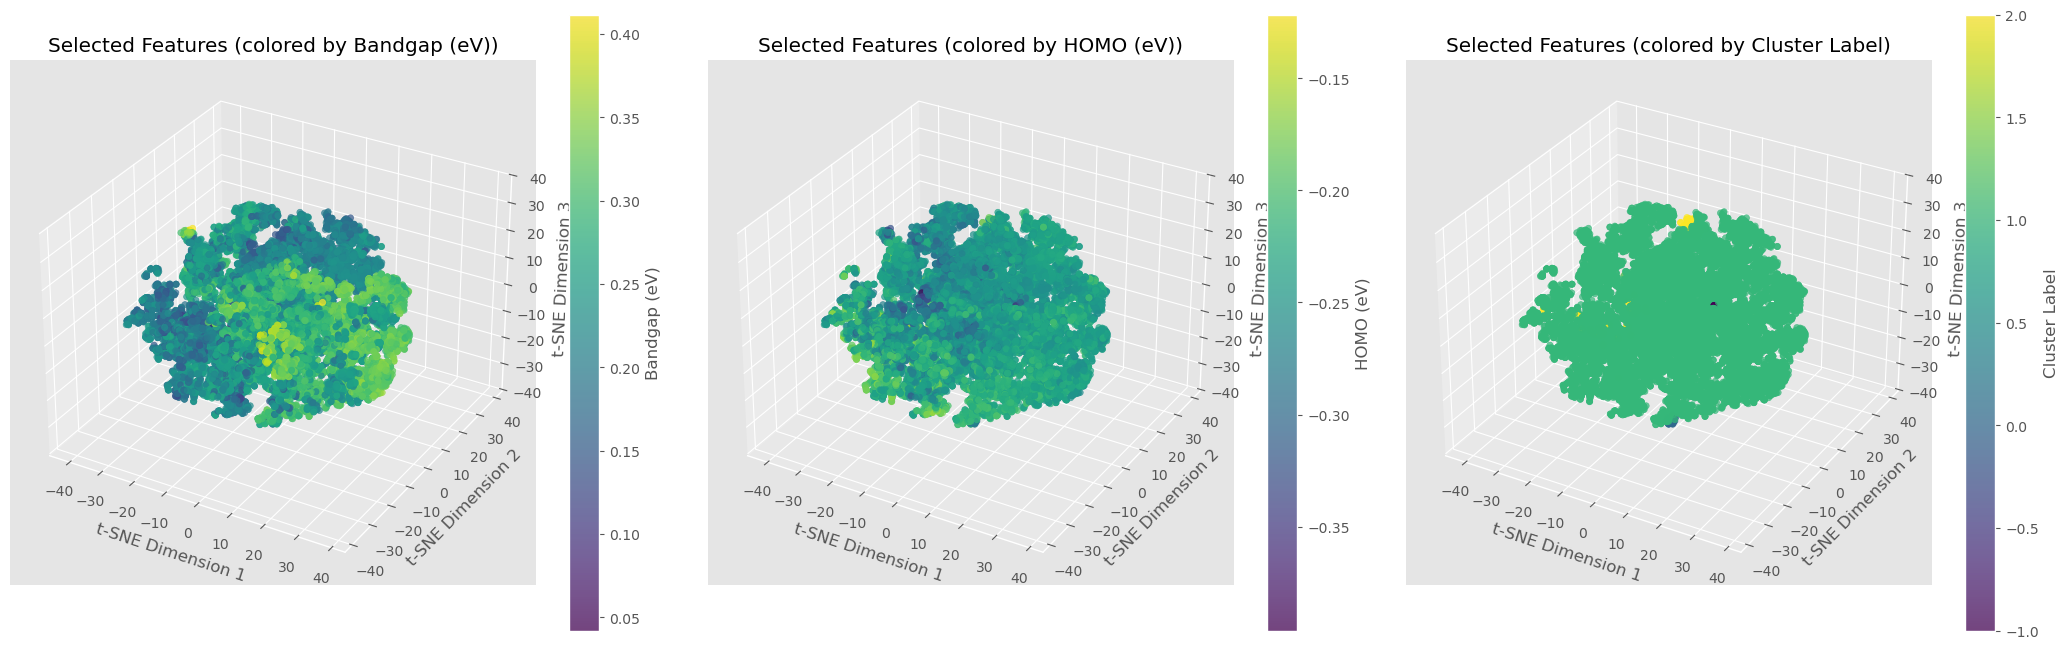

In [51]:
X3 = desc_selected_by_feat.values
cols = ['t-SNE Dimension 1', 't-SNE Dimension 2', 't-SNE Dimension 3']

# Define color data
color_data_3d = {
    'gap': (df['gap'], 'Bandgap (eV)'),
    'homo': (df['homo'], 'HOMO (eV)'),
    'cluster': (df.get('hdbscan_250', df.get('k_6', np.zeros(len(df)))), 'Cluster Label')
}

plot_3d_feature_space(X_tsne_3d, cols, color_data_3d, "Selected Features")

#### Rede SOM

In [41]:
from minisom import MiniSom

map_size_x = 20
map_size_y = 20
som = MiniSom(x=map_size_x, y=map_size_y,
              input_len=X_scaled.shape[1], # número de features
              sigma=10,
              learning_rate=0.5,
              random_seed=42)


In [42]:
som.random_weights_init(X_scaled)
print("Treinando o SOM...")
som.train_random(X_scaled, num_iteration=100000)

Treinando o SOM...


In [43]:
coordinates = np.array([som.winner(x) for x in X_scaled]).astype(float)


Gerando as visualizações...


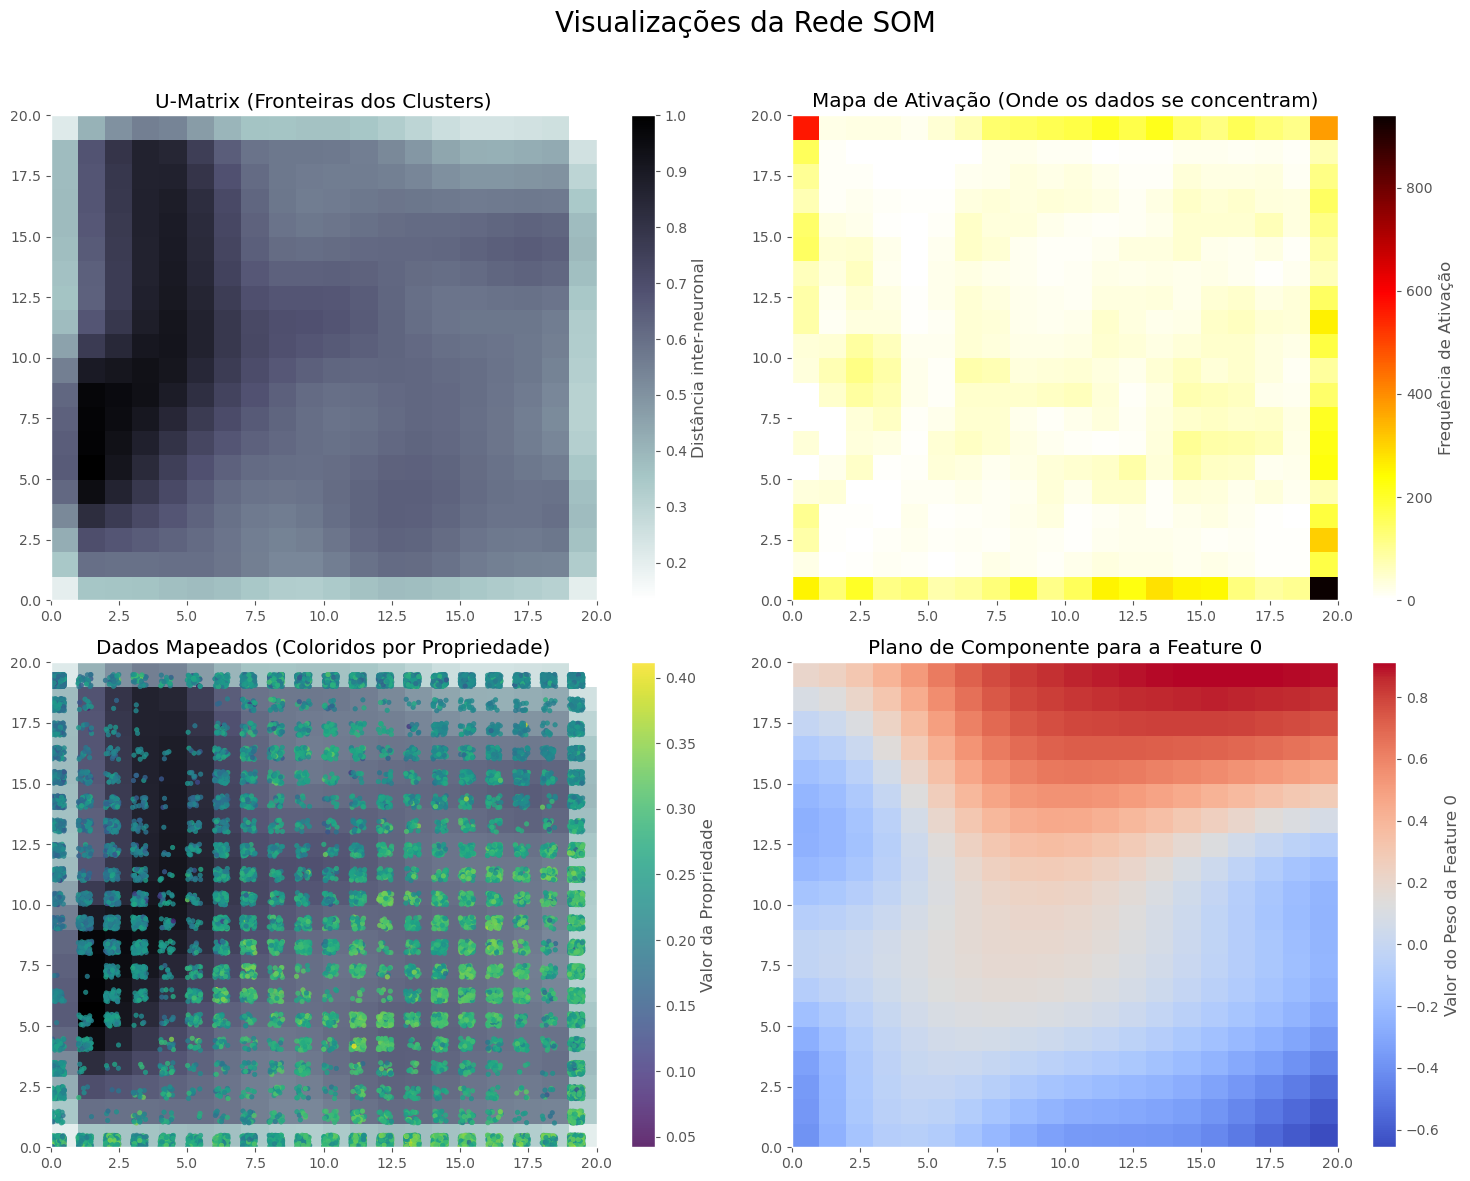

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# --- PRÉ-REQUISITOS (variáveis que já devem existir no seu notebook) ---
# som: O objeto MiniSom já treinado.
# X_scaled: Os dados de entrada, já escalados, que foram usados em som.train_random().

# Para colorir o gráfico de dispersão, precisamos de um array de 'labels'.
# Se você tiver uma propriedade molecular (como HOMO, ou um ID de cluster), use-a aqui.
# Como exemplo, vamos criar um array de zeros.
# <<< SUBSTITUA AQUI pelos seus labels reais (propriedade molecular, cluster, etc.)
try:
    # Tenta usar uma variável 'labels' se ela já existir
    labels = df['gap'].values
except NameError:
    print("Variável 'labels' não encontrada. Usando um placeholder.")
    # Se não existir, cria um array de placeholder. O gráfico não terá cores variadas.
    labels = np.zeros(len(X_scaled))


# --- CÓDIGO DE VISUALIZAÇÃO ---
print("Gerando as visualizações...")

# Criando uma figura para plotar os 4 gráficos principais
plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 12))
fig.suptitle('Visualizações da Rede SOM', fontsize=20)

# Gráfico 1: U-Matrix (Matriz de Distâncias)
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('U-Matrix (Fronteiras dos Clusters)')
# A U-Matrix é calculada a partir dos pesos internos do SOM
u_matrix = som.distance_map().T
im1 = ax1.pcolor(u_matrix, cmap='bone_r')
fig.colorbar(im1, ax=ax1, label='Distância inter-neuronal')

# Gráfico 2: Mapa de Ativação (Heatmap de Frequência)
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Mapa de Ativação (Onde os dados se concentram)')
# Calcula a frequência com que cada neurônio foi o "vencedor"
activation_map = som.activation_response(X_scaled).T
im2 = ax2.pcolor(activation_map, cmap='hot_r')
fig.colorbar(im2, ax=ax2, label='Frequência de Ativação')

# Gráfico 3: Scatter Plot sobre a U-Matrix
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Dados Mapeados (Coloridos por Propriedade)')
# Plota a U-Matrix como um fundo cinza para dar contexto de cluster
ax3.pcolor(u_matrix, cmap='bone_r')
# Pega as coordenadas de cada amostra e adiciona um "jitter" para melhor visualização
winner_coords = np.array([som.winner(x) for x in X_scaled]).T
winner_coords = (winner_coords[0] + np.random.rand(len(X_scaled)) * .5,
                 winner_coords[1] + np.random.rand(len(X_scaled)) * .5)
# Plota os pontos usando os 'labels' para colorir
scatter = ax3.scatter(winner_coords[0], winner_coords[1], c=labels, s=10, cmap='viridis', alpha=0.8)

# Adiciona uma colorbar para os labels
cbar = fig.colorbar(scatter, ax=ax3, label='Valor da Propriedade')
# Se os labels forem categóricos, podemos tentar criar uma legenda
try:
    if len(np.unique(labels)) < 15: # Só cria legenda se houver poucas categorias
        ax3.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(labels).astype(str)), title="Propriedades")
except TypeError:
    pass # Ignora se não for possível criar a legenda


# Gráfico 4: Plano de Componente para uma Feature
ax4 = fig.add_subplot(2, 2, 4)
feature_index = 0 # << MUDE AQUI para visualizar a importância de outra feature (0, 1, 2...)
ax4.set_title(f'Plano de Componente para a Feature {feature_index}')
# Pega os pesos do SOM. A forma é (map_x, map_y, n_features)
weights = som.get_weights()
# Plota o heatmap dos pesos para a feature escolhida
im4 = ax4.pcolor(weights[:,:,feature_index].T, cmap='coolwarm')
fig.colorbar(im4, ax=ax4, label=f'Valor do Peso da Feature {feature_index}')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

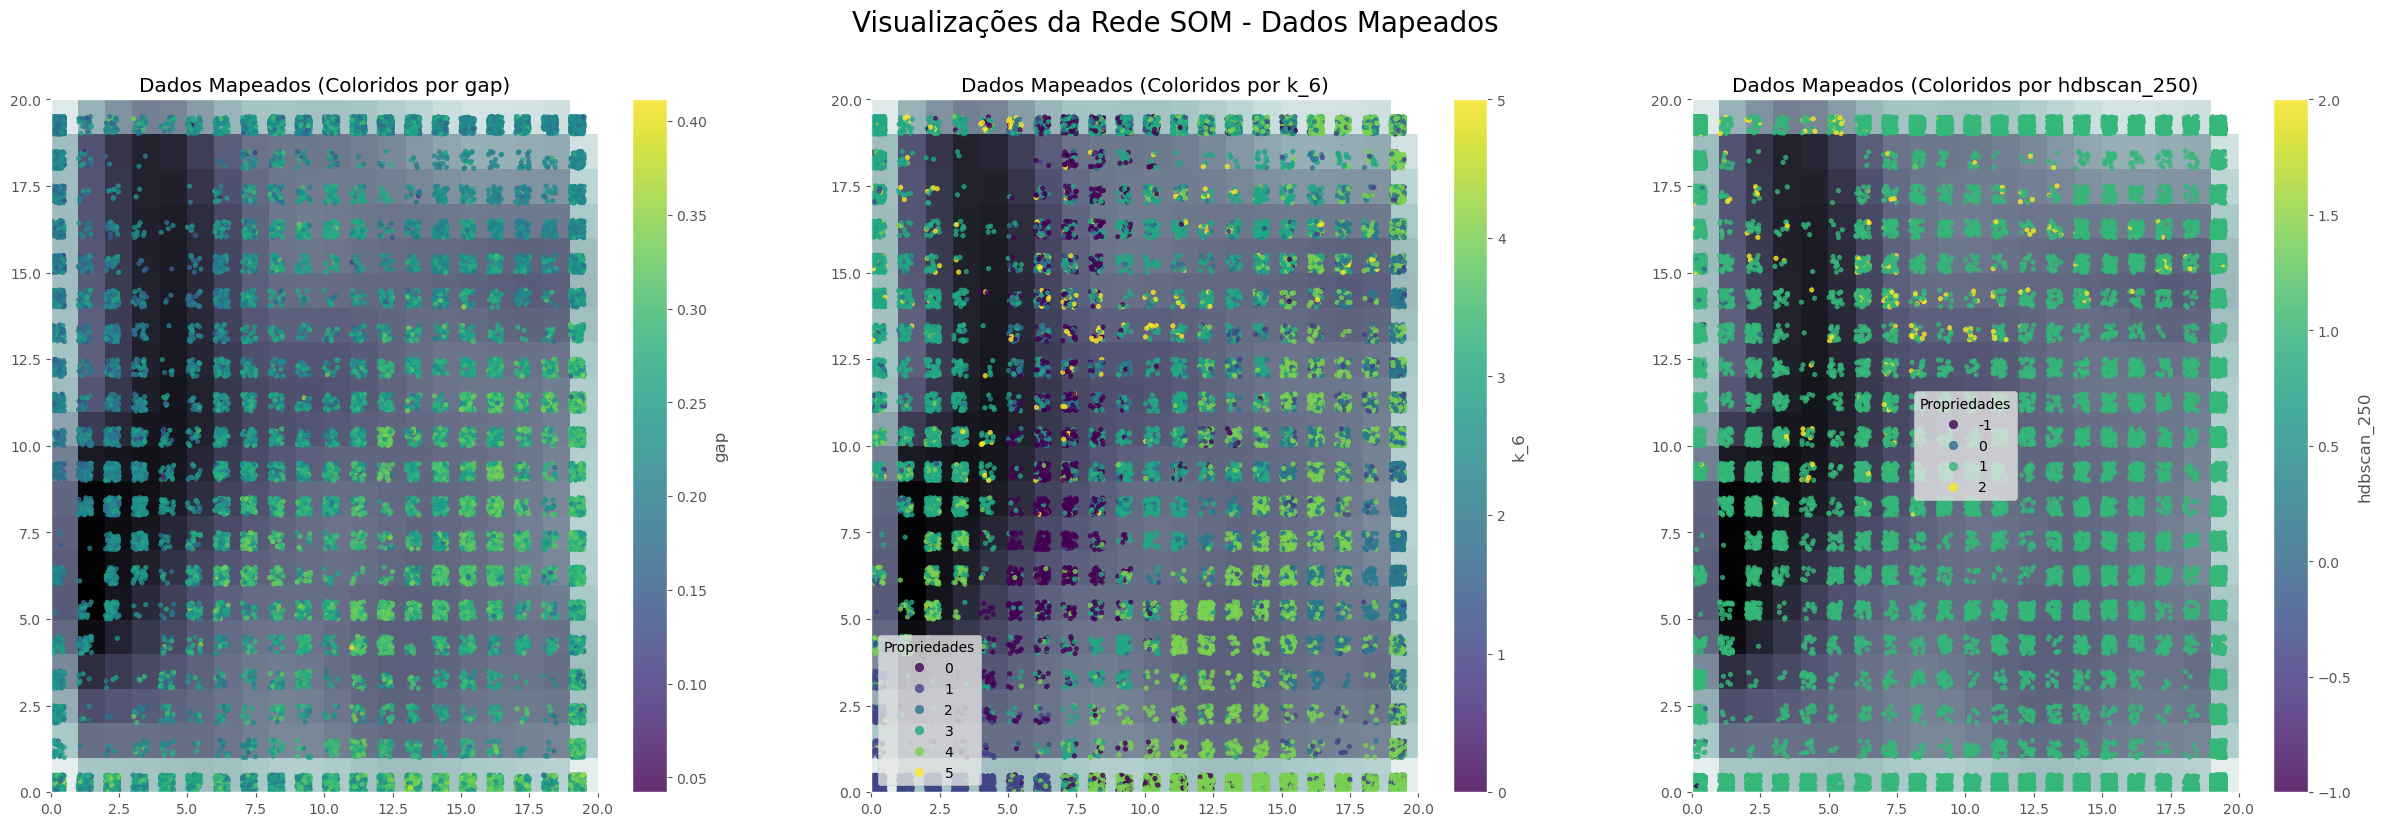

In [62]:

plt.style.use('ggplot')
fig = plt.figure(figsize=(30, 9))
fig.suptitle('Visualizações da Rede SOM - Dados Mapeados', fontsize=20)

for i, label in enumerate(['gap', 'k_6', 'hdbscan_250']):
    try:
        labels = df[label].values
    except KeyError:
        print(f"Variável '{label}' não encontrada. Usando um placeholder.")
        labels = np.zeros(len(X_scaled))
    ax3 = fig.add_subplot(1, 3, i+1)
    ax3.set_title(f'Dados Mapeados (Coloridos por {label})')
    # Plota a U-Matrix como um fundo cinza para dar contexto de cluster
    ax3.pcolor(u_matrix, cmap='bone_r')
    # Pega as coordenadas de cada amostra e adiciona um "jitter" para melhor visualização
    winner_coords = np.array([som.winner(x) for x in X_scaled]).T
    winner_coords = (winner_coords[0] + np.random.rand(len(X_scaled)) * .5,
                    winner_coords[1] + np.random.rand(len(X_scaled)) * .5)
    # Plota os pontos usando os 'labels' para colorir
    scatter = ax3.scatter(winner_coords[0], winner_coords[1], c=labels, s=10, alpha=0.8)

    # Adiciona uma colorbar para os labels
    cbar = fig.colorbar(scatter, ax=ax3, label=label)
    # Se os labels forem categóricos, podemos tentar criar uma legenda
    try:
        if len(np.unique(labels)) < 15: # Só cria legenda se houver poucas categorias
            ax3.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(labels).astype(str)), title="Propriedades")
    except TypeError:
        pass # Ignora se não for possível criar a legenda